# Bihar Aalysis

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm'  
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
parties = []
won = []
leading = []
total = []
for row in table.find_all('tr')[1:-1]:  
    cols = row.find_all('td')
    parties.append(cols[0].text.strip())
    won.append(int(cols[1].text.strip()))
    leading.append(int(cols[2].text.strip()))
    total.append(int(cols[3].text.strip()))
data = pd.DataFrame({
    'Party': parties,
    'Won': won,
    'Leading': leading,
    'Total': total
})
print(data)
data=pd.DataFrame(data)
excel_file="results_loksabha_BiharState.xlsx"
data.to_excel(excel_file, index=True)
print("file created ")

                                               Party  Won  Leading  Total
0                       Janata Dal  (United) - JD(U)   12        0     12
1                       Bharatiya Janata Party - BJP   12        0     12
2             Lok Janshakti Party(Ram Vilas) - LJPRV    5        0      5
3                         Rashtriya Janata Dal - RJD    4        0      4
4                     Indian National Congress - INC    3        0      3
5  Communist Party of India  (Marxist-Leninist)  ...    2        0      2
6            Hindustani Awam Morcha (Secular) - HAMS    1        0      1
7                                  Independent - IND    1        0      1
file created 


In [3]:
data = pd.read_excel("results_loksabha_BiharState.xlsx")
data

,Unnamed: 0,Party,Won,Leading,Total
0,0,Janata Dal (United) - JD(U),12,0,12
1,1,Bharatiya Janata Party - BJP,12,0,12
2,2,Lok Janshakti Party(Ram Vilas) - LJPRV,5,0,5
3,3,Rashtriya Janata Dal - RJD,4,0,4
4,4,Indian National Congress - INC,3,0,3
5,5,Communist Party of India (Marxist-Leninist) ...,2,0,2
6,6,Hindustani Awam Morcha (Secular) - HAMS,1,0,1
7,7,Independent - IND,1,0,1


In [5]:
total_seats_won = data.groupby('Party')['Won'].sum().reset_index()
total_seats = total_seats_won['Won'].sum()
data['Percentage'] = (data['Won'] / total_seats) * 100
print("Percentage of total seats won by each party:")
print(data[['Party', 'Percentage']])

Percentage of total seats won by each party:
                                               Party  Percentage
0                       Janata Dal  (United) - JD(U)        30.0
1                       Bharatiya Janata Party - BJP        30.0
2             Lok Janshakti Party(Ram Vilas) - LJPRV        12.5
3                         Rashtriya Janata Dal - RJD        10.0
4                     Indian National Congress - INC         7.5
5  Communist Party of India  (Marxist-Leninist)  ...         5.0
6            Hindustani Awam Morcha (Secular) - HAMS         2.5
7                                  Independent - IND         2.5


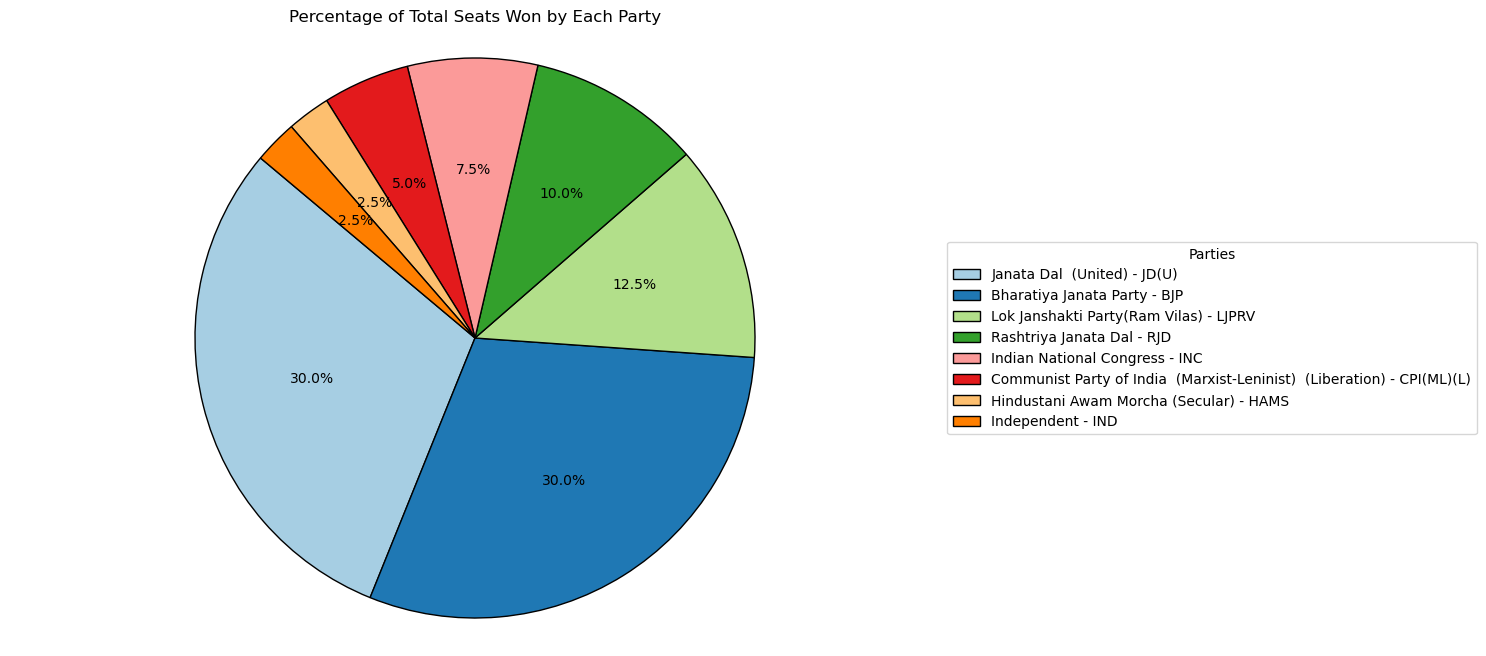

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(range(len(data)))
wedges, texts, autotexts = plt.pie(data['Percentage'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(wedges, data['Party'], title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Total Seats Won by Each Party')
plt.axis('equal')
plt.show()

# Delhi Analysis

In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U05.htm'  
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
parties = []
won = []
leading = []
total = []
for row in table.find_all('tr')[1:-1]:  
    cols = row.find_all('td')
    parties.append(cols[0].text.strip())
    won.append(int(cols[1].text.strip()))
    leading.append(int(cols[2].text.strip()))
    total.append(int(cols[3].text.strip()))
df = pd.DataFrame({
    'Party': parties,
    'Won': won,
    'Leading': leading,
    'Total': total
})
print(df)
df=pd.DataFrame(df)
excel_file="results_loksabha_Delhi.xlsx"
df.to_excel(excel_file, index=True)
print("file created ")

                          Party  Won  Leading  Total
0  Bharatiya Janata Party - BJP    7        0      7
file created 


In [17]:
df = pd.read_excel("results_loksabha_Delhi.xlsx")
df

,Unnamed: 0,Party,Won,Leading,Total
0,0,Bharatiya Janata Party - BJP,7,0,7


In [19]:
total_seats_won = df.groupby('Party')['Won'].sum().reset_index()
total_seats = total_seats_won['Won'].sum()
df['Percentage'] = (df['Won'] / total_seats) * 100
print("Percentage of total seats won by each party:")
print(df[['Party', 'Percentage']])

Percentage of total seats won by each party:
                          Party  Percentage
0  Bharatiya Janata Party - BJP       100.0


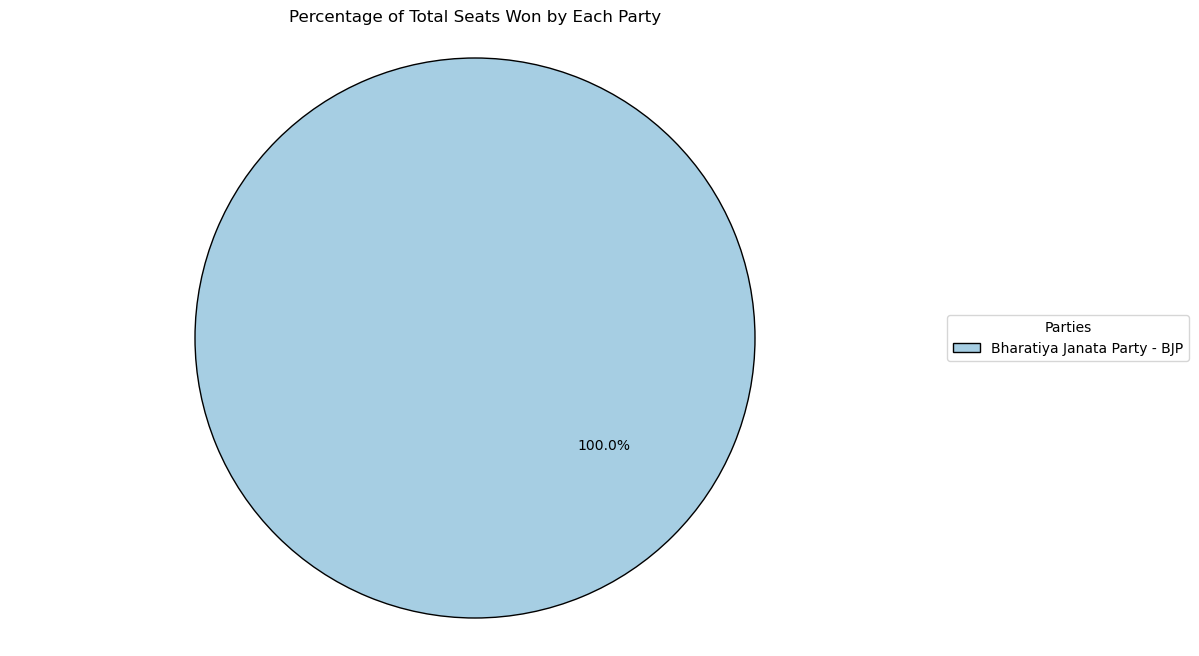

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(range(len(df)))
wedges, texts, autotexts = plt.pie(df['Percentage'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(wedges, df['Party'], title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Total Seats Won by Each Party')
plt.axis('equal')
plt.show()

Similarly we can get analysis for various other states and union teritories of India.
Here i have analyzed Lok Sabha Election data for some of the various states and union teritories.
We can also analyze more data for from https://results.eci.gov.in/